# 19기 Clustering 정규세션 과제

---

## 데이터 불러오기

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("Mall_Customers.csv", index_col = 0)

## EDA
- numerical column : AGE, Annual income, Spending score

In [5]:
sdf.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
for column in df.columns: 
    print(column)
    print(df[column].unique())
    print()

Gender
['Male' 'Female']

Age
[19 21 20 23 31 22 35 64 30 67 58 24 37 52 25 46 54 29 45 40 60 53 18 49
 42 36 65 48 50 27 33 59 47 51 69 70 63 43 68 32 26 57 38 55 34 66 39 44
 28 56 41]

Annual Income (k$)
[ 15  16  17  18  19  20  21  23  24  25  28  29  30  33  34  37  38  39
  40  42  43  44  46  47  48  49  50  54  57  58  59  60  61  62  63  64
  65  67  69  70  71  72  73  74  75  76  77  78  79  81  85  86  87  88
  93  97  98  99 101 103 113 120 126 137]

Spending Score (1-100)
[39 81  6 77 40 76 94  3 72 14 99 15 13 79 35 66 29 98 73  5 82 32 61 31
 87  4 92 17 26 75 36 28 65 55 47 42 52 60 54 45 41 50 46 51 56 59 48 49
 53 44 57 58 43 91 95 11  9 34 71 88  7 10 93 12 97 74 22 90 20 16 89  1
 78 83 27 63 86 69 24 68 85 23  8 18]



In [7]:
df_dummy = pd.get_dummies(df, columns=['Gender'])
df_dummy 

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
CustomerID,,,,,
1,19,15,39,0,1
2,21,15,81,0,1
3,20,16,6,1,0
4,23,16,77,1,0
5,31,17,40,1,0
...,...,...,...,...,...
196,35,120,79,1,0
197,45,126,28,1,0
198,32,126,74,0,1


## 데이터 분석
- Annual Income과 Spending score는 군집이 나타나는 것으로 보임

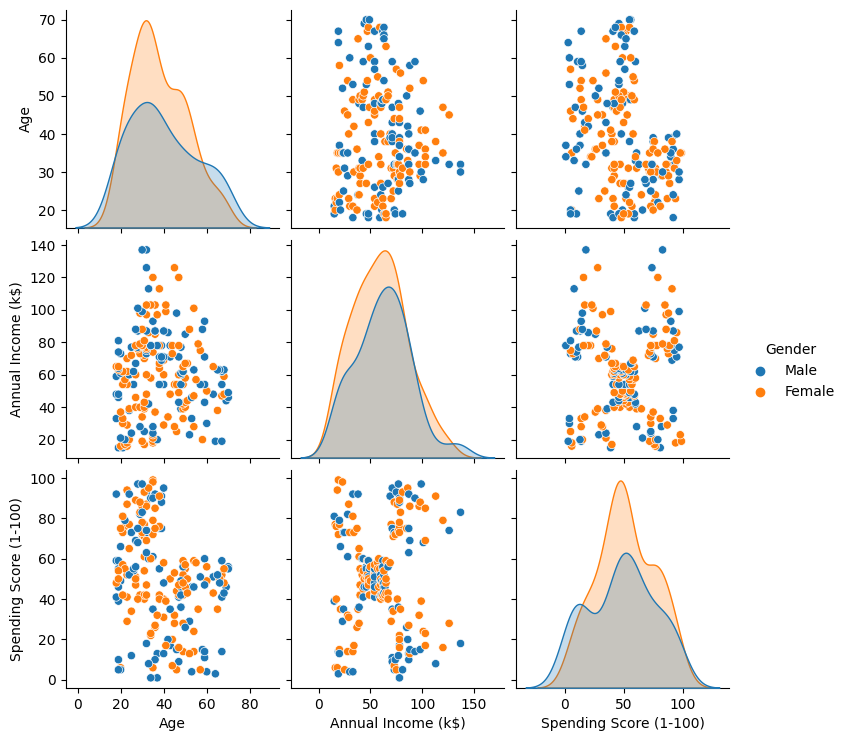

In [8]:
import seaborn as sns

sns.pairplot(df, hue='Gender')

# Hierarchical Clustering

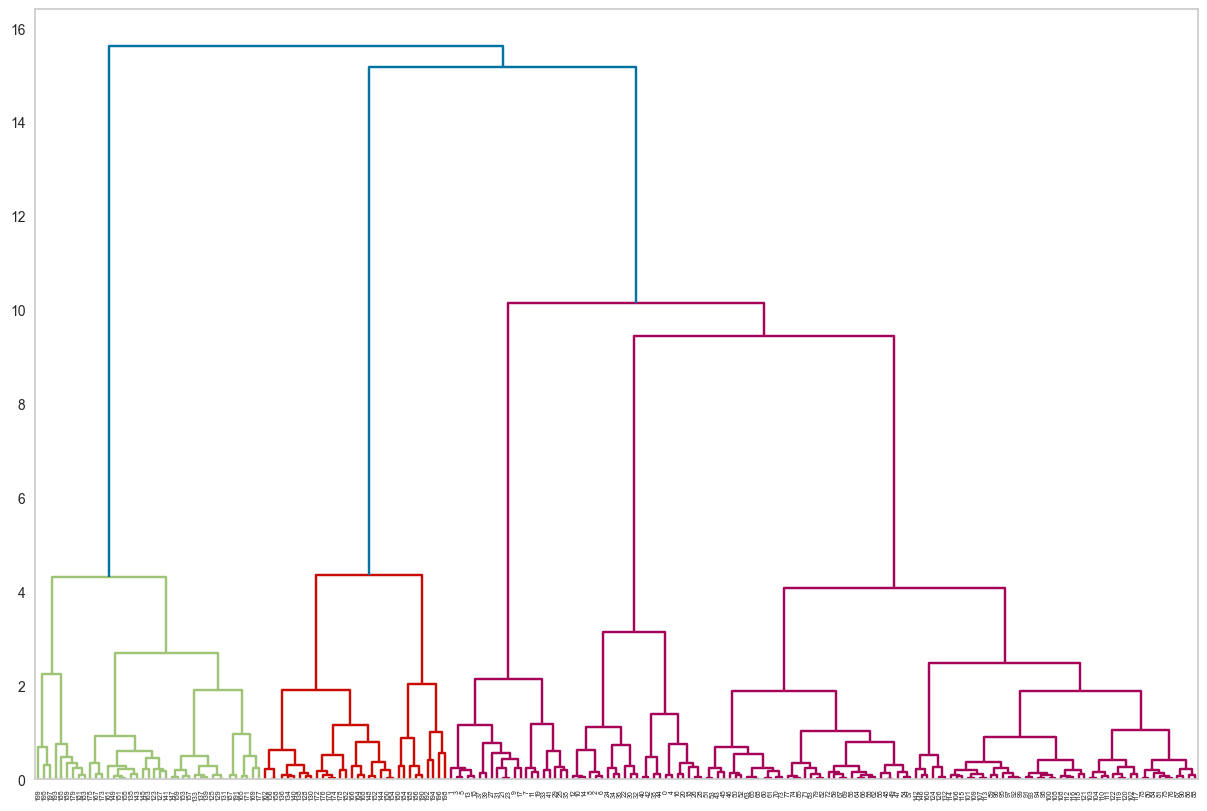

In [36]:
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

#Annual Income vs Spending Score (1-100)
testing_data1 = df[['Annual Income (k$)','Spending Score (1-100)']]

#scailing 
scaler1 = StandardScaler() 
scaler1.fit(testing_data1)
scaled_testing_data1 =scaler1.transform(testing_data1)
scaled_testing_data1 = pd.DataFrame(scaled_testing_data1)

#dendrogram
plt.figure(figsize=(15,10))
plt.grid()
dendrogram(linkage(scaled_testing_data1, method='ward'),leaf_rotation=90) #ward method 
plt.show()

# K-Means

In [9]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [21]:
testing_data2 = df[['Annual Income (k$)','Spending Score (1-100)']]
testing_data2

,Annual Income (k$),Spending Score (1-100)
CustomerID,,
1,15,39
2,15,81
3,16,6
4,16,77
5,17,40
...,...,...
196,120,79
197,126,28
198,126,74


In [20]:
#scailing 
scaler2 = StandardScaler() 
scaler2.fit(testing_data2)
scaled_testing_data2 =scaler2.transform(testing_data2)
scaled_testing_data2 = pd.DataFrame(scaled_testing_data2)
scaled_testing_data2

,0,1
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980
...,...,...
195,2.268791,1.118061
196,2.497807,-0.861839
197,2.497807,0.923953
198,2.917671,-1.250054


/Users/dongjoon/opt/anaconda3/envs/Tobigs/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/dongjoon/opt/anaconda3/envs/Tobigs/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/dongjoon/opt/anaconda3/envs/Tobigs/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/dongjoon/opt/anaconda3/envs/Tobigs/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` 

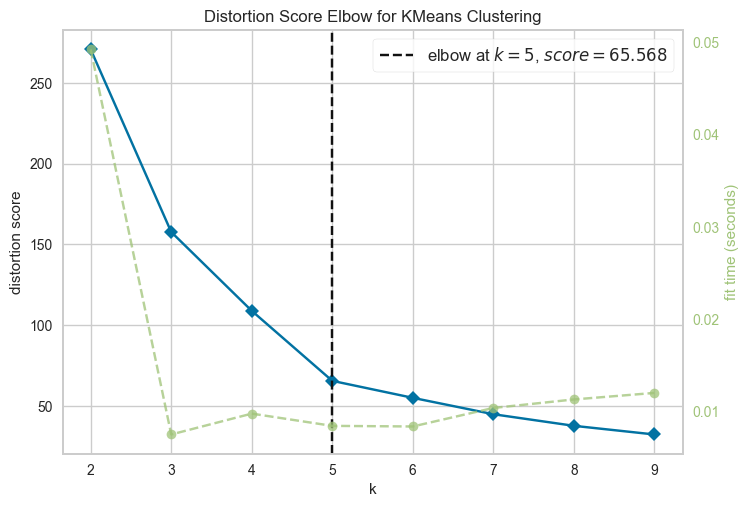

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [12]:
#elbow method
model2 = KMeans(random_state=42)
visualizer = KElbowVisualizer(model2, k=(2,10))

visualizer.fit(scaled_testing_data2)
visualizer.show()

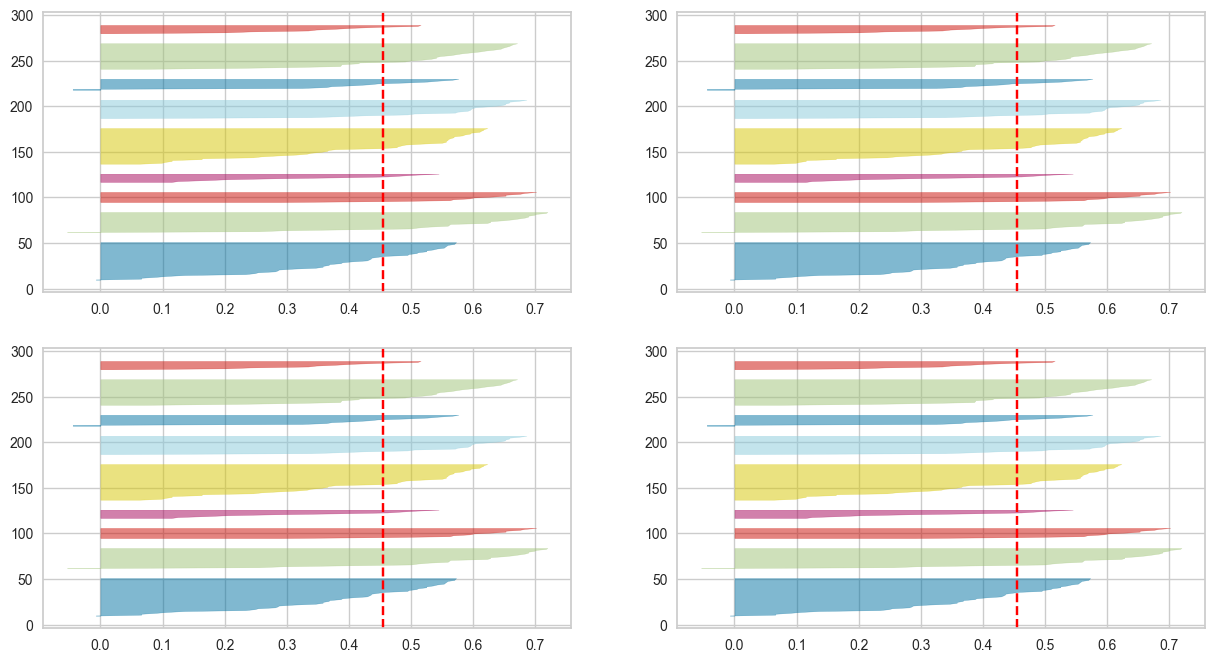

In [10]:
#silhouette plot
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [4, 5, 6, 7]: #n_clusters 
    q, mod = divmod(i, 2)
    visualizer = SilhouetteVisualizer(model2, colors='yellowbrick', ax=ax[q-2][mod])
    visualizer.fit(scaled_testing_data2) 

In [14]:
final_model = KMeans(n_clusters=5, random_state=42).fit(scaled_testing_data2)
df_dummy['K-class'] = final_model.labels_
df_dummy

/Users/dongjoon/opt/anaconda3/envs/Tobigs/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male,K-class
CustomerID,,,,,,
1,19,15,39,0,1,2
2,21,15,81,0,1,3
3,20,16,6,1,0,2
4,23,16,77,1,0,3
5,31,17,40,1,0,2
...,...,...,...,...,...,...
196,35,120,79,1,0,4
197,45,126,28,1,0,1
198,32,126,74,0,1,4


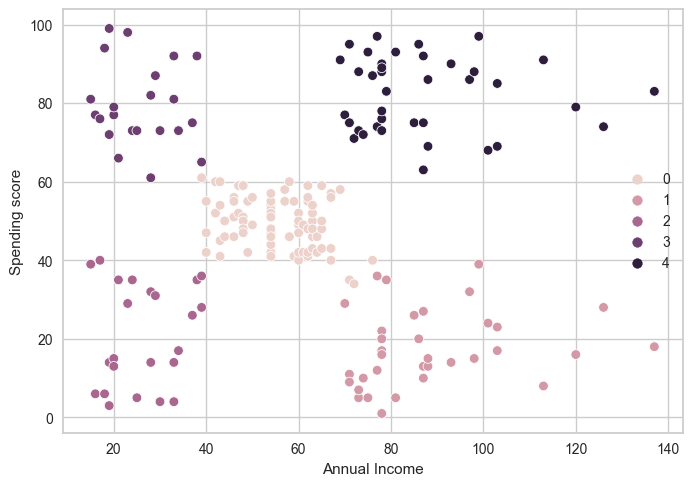

In [15]:
sns.scatterplot(x=df_dummy['Annual Income (k$)'],y=df_dummy['Spending Score (1-100)'], hue=df_dummy['K-class'])
plt.xlabel('Annual Income')
plt.ylabel('Spending score')
plt.legend()
plt.show()

# DBSCAN

In [54]:
from sklearn.cluster import DBSCAN

#Annual Income vs Spending Score (1-100)
testing_data3 = df[['Annual Income (k$)','Spending Score (1-100)']]
testing_data3

#scailing 
scaler3 = StandardScaler() 
scaler3.fit(testing_data3)
scaled_testing_data3 =scaler3.transform(testing_data3)
scaled_testing_data3 = pd.DataFrame(scaled_testing_data3)

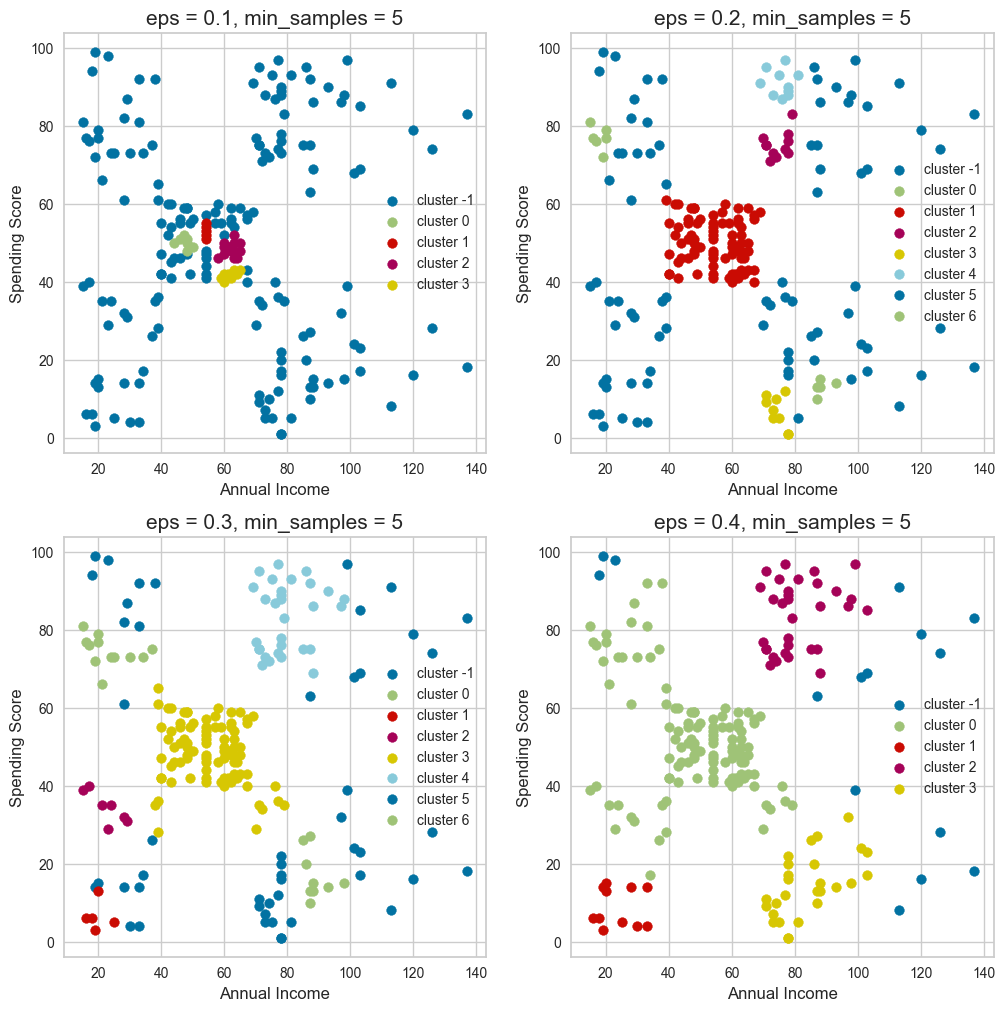

In [89]:
# optimizing eps & min_samples
f, ax = plt.subplots(2, 2)
f.set_size_inches((12, 12))

for i in range(4): 
    min_samples= 5
    eps = 0.10 * (i+1)

    model3 = DBSCAN(min_samples=min_samples, eps = eps)
    model3.fit(scaled_testing_data3)
    testing_data3['cluster'] = model3.fit_predict(scaled_testing_data3)


    for j in range(-1, testing_data3['cluster'].max() + 1):
        ax[i // 2, i % 2].scatter(testing_data3.loc[testing_data3['cluster'] == j, 'Annual Income (k$)'], testing_data3.loc[testing_data3['cluster'] == j, 'Spending Score (1-100)'], 
                        label = 'cluster ' + str(j))

    ax[i // 2, i % 2].legend()
    ax[i // 2, i % 2].set_title('eps = %.1f, min_samples = %d'%(eps, min_samples), size = 15)    
    ax[i // 2, i % 2].set_xlabel('Annual Income', size = 12)
    ax[i // 2, i % 2].set_ylabel('Spending Score', size = 12)
plt.show()

In [86]:
#최종 hyper-parameter 선정
model3 = DBSCAN(min_samples=5, eps = 0.3)
model3.fit(scaled_testing_data3)
testing_data3['cluster'] = model3.fit_predict(scaled_testing_data3)


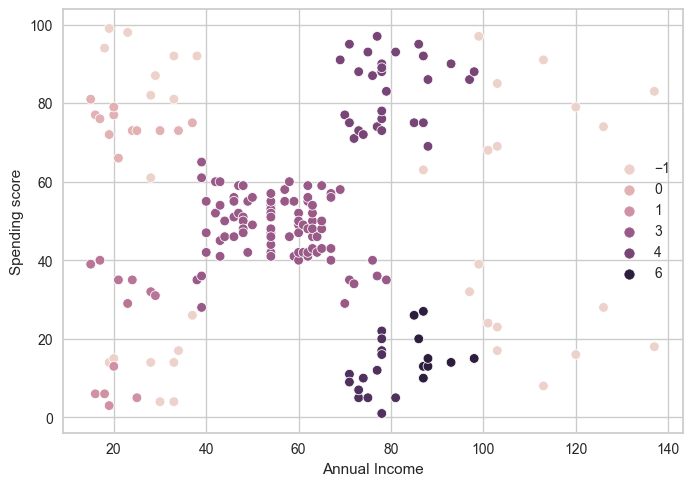

In [88]:
#visualization 
sns.scatterplot(x=testing_data3['Annual Income (k$)'],y=testing_data3['Spending Score (1-100)'],hue=testing_data3['cluster'])
plt.xlabel('Annual Income')
plt.ylabel('Spending score')
plt.legend()
plt.show()